In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('D:/mlproject/src/notebook/data/StudentsPerformance.csv')    

In [4]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
numerical_feaqtures = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Numerical features:', numerical_feaqtures)
print('Categorical features:', categorical_features)

Numerical features: ['math score', 'reading score', 'writing score']
Categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [17]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

In [18]:
df['average_score'] = df['total_score'] / 3

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,148
4,male,group C,some college,standard,none,76,78,75,229,76.333333,229


In [20]:
df.drop(['total score'], axis=1, inplace=True)

In [21]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218


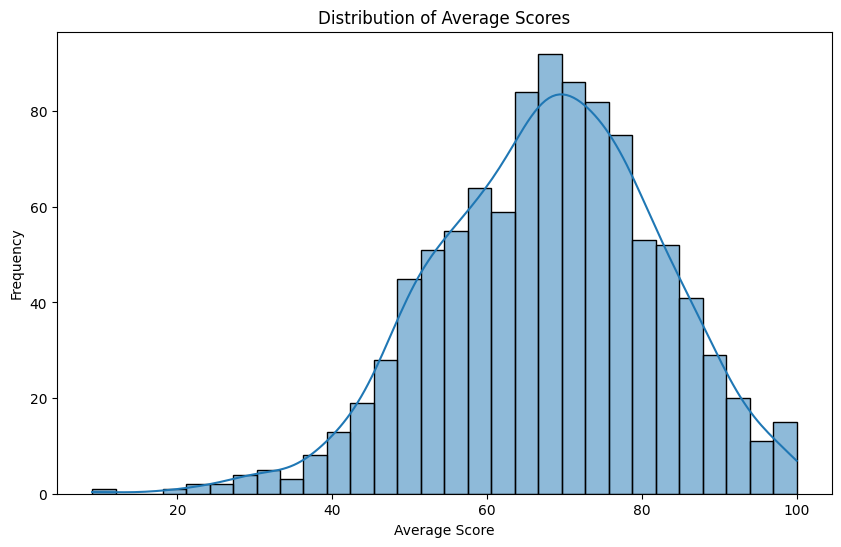

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['average_score'], bins=30, kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()  

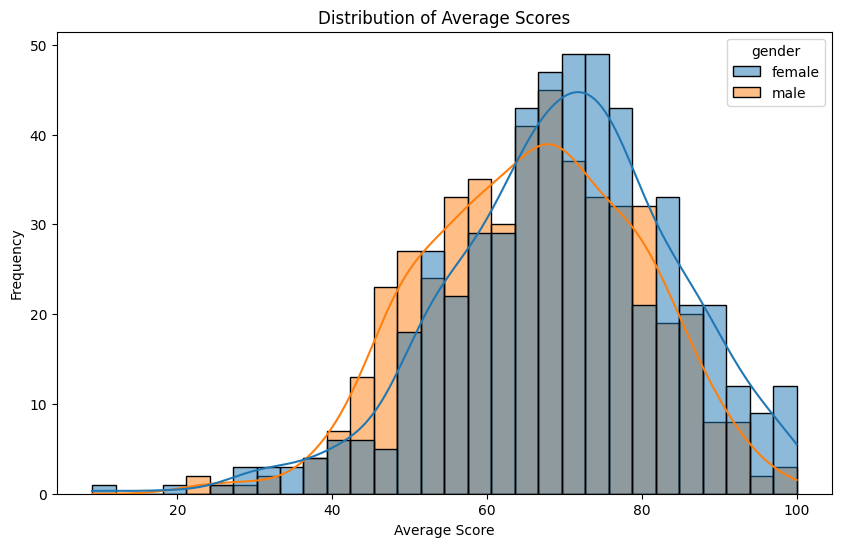

In [24]:
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x='average_score',
    hue='gender',
    bins=30,
    kde=True
)

plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()


In [26]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


In [27]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218


In [32]:
y=df['math score']

In [34]:
x=df.drop(['math score', 'average_score','total_score'], axis=1)

In [35]:
x.head(1)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74


In [36]:
num_features=x.select_dtypes(include=['int64', 'float64']).columns
cat_features=x.select_dtypes(include=['object']).columns

In [37]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)

In [38]:
x.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74


In [39]:
x.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74


In [40]:
x=preprocessor.fit_transform(x)

In [42]:
x.shape

(1000, 19)

In [47]:
x=pd.DataFrame(x)

In [48]:
x.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.193999,0.391492,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [50]:
models={
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

In [51]:
model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = sklearn.metrics.r2_score(y_test, y_pred)
    model_list.append(model_name)
    r2_list.append(r2)
    print(f"{model_name} R2 Score: {r2}")   
    
    

RandomForest R2 Score: 0.6409115864984729
XGBoost R2 Score: 0.8212204901494256
CatBoost R2 Score: 0.8516318920747058
